In [1]:
#Chargement des données
# Data
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os 
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import math
# Graphics
import seaborn as sns 

from sklearn.experimental import enable_halving_search_cv # noqa

from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
# from sklearn.metrics import root_mean_squared_error

In [2]:
load_dotenv('BDD_URL.env')
BDD_URL = os.environ['BDD_URL']
engine = create_engine(BDD_URL)

SQL_filtre= """
SET search_path to principal;
SELECT *
from "filmview"
where 'Comedy' = ANY(string_to_array("genres", ','))
limit 10000;
"""
SQL= """
SET search_path to principal;
SELECT  "primaryTitle", "titleType", "isAdult", "startYear", "runtimeMinutes", "genres", "averageRating", "directors", "writers", "actor", "producer", "cinematographer", "composer", "editor", "production_designer", "self", "archive_footage", "archive_sound"
from "castview"
where "runtimeMinutes" Is NOT null and "averageRating" is NOT NULL and "genres" is NOT NULL and "startYear" is NOT NULL and "isAdult" is NOT NULL  and "directors" is NOT NULL and  "writers" is NOT NULL  and  "actor" is NOT NULL  and  "producer" is NOT NULL
limit 100000;
"""

#and "titleType" = 'movie' 

df = pd.read_sql(SQL, engine)
engine.dispose()
df

,primaryTitle,titleType,isAdult,startYear,runtimeMinutes,genres,averageRating,directors,writers,actor,producer,cinematographer,composer,editor,production_designer,self,archive_footage,archive_sound
0,35 Minuten Verspätung,tvEpisode,0,1971,24,"Action,Adventure,Crime",7.0,Hermann_Leitner,Heinz-Werner_John,"Anna_Smolik,Dirk_Dautzenberg,Eckart_Dux,Klausj...",Gyula_Trebitsch,Hans_Jura,Haralt_Winkler,Alice_Ludwig,None,None,None,None
1,Besuch aus Denver,tvEpisode,0,1972,24,"Action,Adventure,Crime",6.0,Claus_Peter_Witt,Herbert_Lichtenfeld,"Eckart_Dux,Gerhard_Dressel,Karl-Heinz_Hess,Rai...",Gyula_Trebitsch,Manfred_Ensinger,Hans_Günther_Leonhardt,Alice_Ludwig,None,None,None,None
2,Bitte die Fahrkarten,tvEpisode,0,1972,24,"Action,Adventure,Crime",7.2,Claus_Peter_Witt,Friedhelm_Werremeier,"Eckart_Dux,Lothar_Grützner,Reiner_Brönneke,Sie...",Gyula_Trebitsch,Manfred_Ensinger,Hans_Günther_Leonhardt,Alice_Ludwig,None,None,None,None
3,Der 7. Kanal,tvEpisode,0,1974,24,"Action,Adventure,Crime",6.3,Hermann_Leitner,Irene_Rodrian,"Ewa_Strömberg,Jens_Weisser,Mathias_Einert,Soph...",Gyula_Trebitsch,Hans_Jura,None,Alice_Ludwig,Albrecht_Becker,None,None,None
4,Der Blechsarg,tvEpisode,0,1972,24,"Action,Adventure,Crime",6.2,Claus_Peter_Witt,Irene_Rodrian,"Bruno_Dietrich,Joachim_Rake,Jochen_Sehrndt,Rob...",Gyula_Trebitsch,Manfred_Ensinger,Hans_Günther_Leonhardt,Alice_Ludwig,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Magnolia Bloom,short,0,2021,15,"Drama,Short",8.2,Tayo_Amos,"Joi_Elaine,Matt_Mitchell","Harold_Daniels_III,Joseph_Lopez,Lex_Scott_Davi...",Julia_Dillard,Matthew_Steven_Wilder,Sturdivant_Adams,None,None,None,None,None
99996,Dublin 26.06.08: A Movie in 4 Days,movie,0,2008,48,"Comedy,Drama,Sci-Fi",4.3,"Graham_Cantwell,Kevin_Marron,Lenny_Abrahamson,...",Lenny_Abrahamson,"Karl_Argue,Philomena_Fitzpatrick,Sarah_Carroll...",Andrew_McAvinchey,None,None,None,None,None,None,None
99997,Die Spätzünder,tvMovie,0,2010,90,"Comedy,Drama,Music",6.4,Wolfgang_Murnberger,"Gabriel_Castaneda,Uli_Brée","Bibiane_Zeller,Jan_Josef_Liefers,Joachim_Fuchs...","Danny_Krausz,Kurt_Stocker",None,Stefan_Bernheimer,None,None,None,None,None
99998,Missing,short,0,2009,12,Short,6.6,Jochem_de_Vries,Jochem_de_Vries,"Gitta_Fleuren,Lotje_Molin",Reinette_van_de_Stadt,Remko_Schnorr,Jina_Sumedi,Manuel_Rombley,Florian_Legters,None,None,None


In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   primaryTitle         100000 non-null  object 
 1   titleType            100000 non-null  object 
 2   isAdult              100000 non-null  int64  
 3   startYear            100000 non-null  int64  
 4   runtimeMinutes       100000 non-null  int64  
 5   genres               100000 non-null  object 
 6   averageRating        100000 non-null  float64
 7   directors            100000 non-null  object 
 8   writers              100000 non-null  object 
 9   actor                100000 non-null  object 
 10  producer             100000 non-null  object 
 11  cinematographer      60249 non-null   object 
 12  composer             67075 non-null   object 
 13  editor               36589 non-null   object 
 14  production_designer  8688 non-null    object 
 15  self              

Text(0, 0.5, 'Nombre de Film')

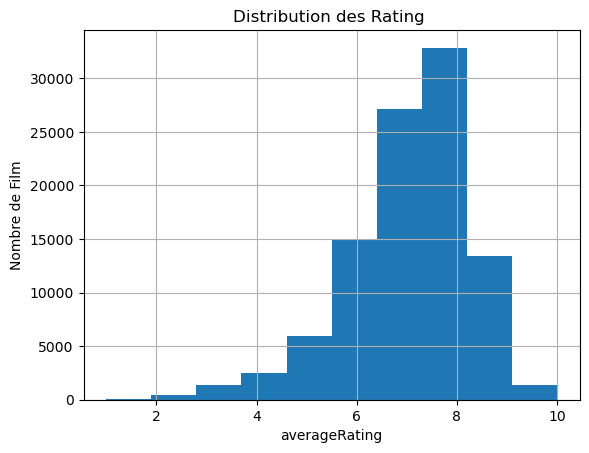

In [5]:
df['averageRating'].hist()
plt.title('Distribution des Rating ')
plt.xlabel('averageRating')
plt.ylabel('Nombre de Film')

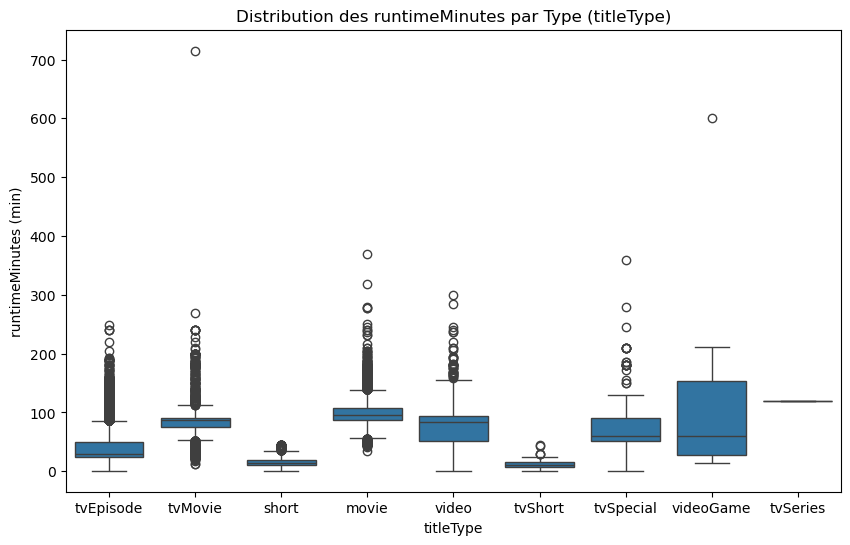

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='titleType', y='runtimeMinutes', data=df)
plt.title('Distribution des runtimeMinutes par Type (titleType)')
plt.xlabel('titleType')
plt.ylabel('runtimeMinutes (min)')
plt.show()

In [4]:
def liste_en_texte(lst):
    if isinstance(lst, list):
        return ' '.join(lst)
    else:
        return lst

In [5]:
def cleanText(df):
    df.fillna('missing', inplace=True)
    df=df.str.replace(',', ' ')
    return df

In [6]:
columns_to_clean = ['primaryTitle', 'titleType', 'genres', 'directors', 'writers', 
                    'actor', 'producer', 'cinematographer', 'composer', 'editor', 
                    'production_designer', 'self', 'archive_footage', 'archive_sound']

for column in columns_to_clean:
    df[column] = cleanText(df[column])

In [7]:
df

,primaryTitle,titleType,isAdult,startYear,runtimeMinutes,genres,averageRating,directors,writers,actor,producer,cinematographer,composer,editor,production_designer,self,archive_footage,archive_sound
0,Freddy,movie,0,2023,109,Biography Drama,8.4,Giancarlo_Beras-Goico,José_Vásquez,Danny_Radhames_Vasquez_Castillo Héctor_Aníbal ...,Alfonso_Rodríguez,Frankie_Baez,Alex_Mansilla,Tabaré_Blanchard,missing,missing,missing,missing
1,Lovers,movie,0,2019,78,Comedy Drama Romance,6.2,Rebecca_Panian,Björn_von_der_Wellen Rebecca_Panian,Björn_von_der_Wellen Janina_Elkin Magdalena_St...,Timon_Birkhofer,Meret_Madörin Ramón_Königshausen,Kevin_Smithers,Anna-Lena_Laura_Engelhardt,missing,missing,missing,missing
2,Friday the 13th: Vengeance,movie,0,2019,95,Horror,5.0,Dustin_Montierth Jeremy_W._Brown,Mike_Meade T.C._De_Witt,Brayden_Daher Drew_Tacher Emily_Aron Tom_McLou...,Jason_Brooks Maddie_Goodwin,missing,missing,missing,missing,missing,missing,missing
3,5 Galaxies,movie,0,2019,83,Action Drama Sci-Fi,3.7,Amir_Reichart Kristen_Hilkert Nelson_Lee Vital...,Ashlee_Mundy Kristen_Hilkert Nelson_Lee Peer_G...,Eric_Roberts Lawrence_Kao Nelson_Lee Pom_Kleme...,Mary_Pat_Bentel,missing,missing,missing,missing,missing,missing,missing
4,Sepultura Endurance,movie,0,2017,100,Documentary,7.3,Otavio_Juliano,Otavio_Juliano,David_Ellefson Derrick_Green Eloy_Casagrande J...,Luciana_Ferraz,missing,Sepultura,missing,missing,missing,missing,missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Crossed Trails,movie,0,1948,53,Western,5.6,Lambert_Hillyer,Adele_Buffington,Douglas_Evans Johnny_Mack_Brown Kathy_Frye Lyn...,Louis_Gray,Harry_Neumann,missing,Fred_Maguire,missing,missing,missing,missing
9996,Cry of the City,movie,0,1948,95,Crime Drama Film-Noir,7.2,Robert_Siodmak,Ben_Hecht Henry_Edward_Helseth Richard_Murphy,Fred_Clark Richard_Conte Shelley_Winters Victo...,Sol_C._Siegel,missing,Alfred_Newman,missing,missing,missing,missing,missing
9997,La dama del velo,movie,0,1949,104,Drama,7.0,Alfredo_B._Crevenna,Edmundo_Báez Egon_Eis,Armando_Calvo Ernesto_Alonso José_Baviera Libe...,Rodolfo_Lowenthal,Jack_Draper,Raúl_Lavista,missing,missing,missing,missing,missing
9998,A Date with Judy,movie,0,1948,113,Comedy Musical Romance,6.5,Richard_Thorpe,Aleen_Leslie Dorothy_Cooper Dorothy_Kingsley,Carmen_Miranda Elizabeth_Taylor Jane_Powell Wa...,Joe_Pasternak,Robert_Surtees,missing,missing,missing,missing,missing,missing


In [8]:
# Séparation des caractéristiques et de la cible
X = df.drop(columns=["averageRating"])
# X = df[['genres','actor']]
y = df["averageRating"]

# Séparation des données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [9]:
# Définition des colonnes numériques, textuelles et de description
numeric_features = ['startYear', 'runtimeMinutes']
boolean_features = 'isAdult'
text_features = ['titleType']

In [10]:
# Création des transformers pour les colonnes numériques, booléennes, textuelles et de description
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

boolean_transformer = FunctionTransformer(lambda x: x.astype(bool).values.reshape(-1, 1)) 

text_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

Vect_transformer = Pipeline([
    # ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), 
    ('vect', CountVectorizer(decode_error='ignore', analyzer='word')) #max_features=1000, analyzer="word"
])
tfidf_transformer = Pipeline([
    # ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), 
    ('tf_idf', TfidfVectorizer(decode_error='ignore',analyzer='word')) #max_features=1000, sublinear_tf=True
])
# Création d'un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('bool', boolean_transformer, boolean_features),
        # ('text', text_transformer, text_features), # c'est titleType
        
        ('title', Vect_transformer, 'primaryTitle'), 
        
        ('genres', tfidf_transformer, 'genres'),
        ('producer', tfidf_transformer, 'producer'),       
        ('directors', tfidf_transformer, 'directors'),
        ('writers', tfidf_transformer, 'writers'),
        ('actor', tfidf_transformer, 'actor'),

        ('cinematographer', tfidf_transformer, 'cinematographer'),
        ('composer', tfidf_transformer, 'composer'),
        ('editor', tfidf_transformer, 'editor'),
        ('production_designer', tfidf_transformer, 'production_designer'),
        ('selfy', tfidf_transformer, 'self'),
        ('archive_footage', tfidf_transformer, 'archive_footage'),
        ('archive_sound', tfidf_transformer, 'archive_sound')
        
        
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['startYear', 'runtimeMinutes']),
                                ('bool',
                                 FunctionTransformer(func=<function <lambda> at 0x0000029AFD8BAC00>),
                                 'isAdult'),
                                ('title',
                                 Pipeline(steps=[('vect',
                                                  CountVectorizer(decode_error='ignore'))]),
                                 'primaryTitle'),
                                ('genres',
                                 Pipel...
                                                  TfidfVectorizer(decode_error='ignore'))]),
                                 'production_designer'),
                                ('selfy',
                                 Pipeline(steps=[('tf_idf',
                                                  TfidfVectorizer(decode_error='ignore'))]),
                                 'self'),
                                ('archive_footage',
                                 Pipeline(steps=[('tf_idf',
                                                  TfidfVectorizer(decode_error='ignore'))]),
                                 'archive_footage'),
                                ('archive_sound',
                                 Pipeline(steps=[('tf_idf',
                                                  TfidfVectorizer(decode_error='ignore'))]),
                                 'archive_sound')])

In [11]:
# Création des pipelines pour chaque modèle
pipelines = {
    # 'Linear Regression': Pipeline([('preprocessor', preprocessor), ('regressor', LinearRegression())]),
    'Ridge Regression': Pipeline([('preprocessor', preprocessor), ('regressor', Ridge())]),
    # 'Lasso Regression': Pipeline([('preprocessor', preprocessor), ('regressor', Lasso())]),
    # 'ElasticNet': Pipeline([('preprocessor', preprocessor), ('regressor', ElasticNet())]),
     'Random Forest Regression': Pipeline([('preprocessor', preprocessor), ('regressor', RandomForestRegressor())]),
    # 'Gradient Boosting Regression': Pipeline([('preprocessor', preprocessor), ('regressor', GradientBoostingRegressor())]),
    # 'SVR': Pipeline([('preprocessor', preprocessor), ('regressor', SVR())]),
}

# Paramètres pour GridSearchCV pour chaque modèle
parameters = {
    # 'Linear Regression': {'regressor__fit_intercept': [True,False]},
    'Ridge Regression': {'regressor__alpha': [0.1, 1.0, 5.0,10]},
    # 'Lasso Regression': {'regressor__alpha': [0.1, 1.0, 5.0,10]},
    # 'ElasticNet': {'regressor__alpha': [0.1, 1.0, 5.0,10], 'regressor__l1_ratio': [0.1, 0.5, 0.9]},
     'Random Forest Regression': {'regressor__n_estimators': [100], 'regressor__max_depth': [100]},# None, 
    # 'Gradient Boosting Regression': {'regressor__n_estimators': [150,200], 'regressor__max_depth': [50, 100]},
    # 'SVR': {'regressor__kernel': ['linear', 'rbf'], 'regressor__C': [0.1, 1.0, 10.0]},
}

# Scoring : RMSE, R2 et MAE
scoring = {'RMSE': 'neg_root_mean_squared_error',
           'R2': 'r2',
           'MAE': 'neg_mean_absolute_error'}


In [12]:
def Grid(X_train, y_train, pipeline, parameters, cv=5):


  # Grid search
  grid = GridSearchCV(pipeline, parameters,  scoring=scoring, refit='RMSE', cv=cv, n_jobs =-1, verbose = 0)#, error_score='raise'

  # Fit
  grid.fit(X_train, y_train)

  # Scores and results
  best_score = grid.best_score_.round(4)
  best_params = grid.best_params_
  training_time = grid.cv_results_['mean_fit_time'].mean().round(4)

  # Output
  return({
      'best_score': best_score,
      'best_params': best_params,
      'training_time': training_time,
      'fitted_model': grid.best_estimator_
  })

In [13]:
def afficheResults (grid):
    model_name = grid['fitted_model'].named_steps['regressor'].__class__.__name__
    print(f"{model_name} training time: {grid['training_time']}")
    print(f"Best {model_name} parameters: {grid['best_params']}")
    print(f"Best {model_name} score: {-grid['best_score']}")
 
    
    

In [14]:
# Boucle sur les modèles pour ajuster avec GridSearchCV
models = {}

# Boucle sur les modèles pour ajuster avec GridSearchCV et évaluation
for model_name, pipeline in pipelines.items():
    print(f"\n..............{model_name}..............................")
    grid_search = Grid(X_train, y_train, pipeline, parameters[model_name], cv=5)
    afficheResults (grid_search)
    
    best_model = grid_search['fitted_model']
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    Rmse = round(math.sqrt(mse), 4)
    models[model_name] = [best_model,Rmse]
    print(f"{model_name} RMSE: {Rmse}")


..............Ridge Regression..............................
Ridge training time: 4.4967
Best Ridge parameters: {'regressor__alpha': 10}
Best Ridge score: 0.9015
Ridge Regression RMSE: 0.9029

..............Random Forest Regression..............................


In [ ]:
'''
# Evaluation des modèles sur les données de test
print("\nComparaison des performances des modèles sur les données de test:")
for model_name, mse in results.items():
    print(f"{model_name}: MSE = {mse}")
    
'''

'\n# Evaluation des modèles sur les données de test\nprint("\nComparaison des performances des modèles sur les données de test:")\nfor model_name, mse in results.items():\n    print(f"{model_name}: MSE = {mse}")\n    \n'